# Pharmaceutical Supply Chain Inventory Optimization

## Optimizing Inventory Considering Shelf Life and Market Trends to Reduce Loss From Overproduction

## 1. Import packages

Here, we import all the packages that will be needed for this project.

In [1]:
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
from sklearn.tree import DecisionTreeRegressor # For building DecisionTree models
from sklearn.metrics import (mean_squared_error, # ML model metrics
                             mean_absolute_error,
                             mean_absolute_percentage_error)
from sklearn.model_selection import train_test_split # Split models into train and test set
from sklearn.preprocessing import LabelEncoder # Feature encoder

import warnings
warnings.filterwarnings('ignore')

## 2. Data Exploration and Preprocessing

In this section, we aim to explore the dataset. Specifically,
- load the dataset,
- understand the structure and its contents,
- perform descriptive statistics, basically meaning that we want to explore the variability, distribution and frequency of some of the parameters in the dataset,
- visualize parts of the data to understand patterns and trends.

We will begin here by importing our dataset, saved as `Dataset.csv` into Python. We will be doing this with pandas.

In [2]:
# Import the dataset to Python
df = pd.read_csv('Dataset.csv')

Now that our data has been imported, let's take a quick glance at the dataset to get a rough understanding of the contents of the dataset. We are going to do this by viewing the first five (5) rows of the dataset, to see the contents.

In [3]:
# See the first five rows of the dataset
df.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location
0,Product_1,277,602.6,545,0.906303,Compliant,Supplier_2,Location_B,Category_B,22,Warehouse_C
1,Product_2,343,359.4,345,0.972500,Compliant,Supplier_1,Location_C,Category_C,24,Warehouse_C
2,Product_3,291,983.0,915,1.026074,Non-compliant,Supplier_5,Location_C,Category_A,24,Warehouse_B
3,Product_4,298,789.4,751,0.911503,Compliant,Supplier_8,Location_C,Category_A,20,Warehouse_B
4,Product_5,260,326.8,430,1.052617,Compliant,Supplier_10,Location_A,Category_B,21,Warehouse_A


As can be seen, some columns are numerical and others are in text format. To get a good understanding of what each column represent, here's a quick explanation/definition for each column.
- `Product_ID`: Product unique identifier, for each product.
- `Shelf_Life_Days`: Shelf life of the pharmaceutical product in days. This indicates the number of days that a product can be stored before it loses its effectiveness, quality or safety.
- `Sales_2021`: Total number of sales of that product in 2021.
- `Sales_2022`: Total number of sales of that product in 2022.
- `Market_Trend_Factor`: An index that measures factors like market trends, consumer preferences, competitor actions, and other external factors. A positive market trend factor indicates that the product is growing in popularity and profitability, while a negative market trend factor suggests that the product is losing its market share and revenue potential.
- `Compliance_Status`: This is an indication of whether or not a drug is compliant with regulation. Can be either of two things 'Compliant' or 'Non-compliant'.
- `Supplier_ID`: The anonymised identity of the supplier of that pharmaceutical product.
- `Manufacturing_Location`: The location where the product is manufactured.
- `Product_Category`: An anonymized grouping/category of the product.
- `Safety_Stock_Days`: Refers to the number of days of inventory that the company keeps on hand to ensure that it can meet demand even if there are unexpected supply chain disruptions or delays.
- `Storage_Location`: The location where the product is stored.

The next thing here is to check for missing values in the dataset, we do this because we do not want to have datatype errors that occur when manipulating data with missing values (represented as `NaN` in pandas). We will check for them, and hendle them if necessary.

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

Product_ID                0
Shelf_Life_Days           0
Sales_2021                0
Sales_2022                0
Market_Trend_Factor       0
Compliance_Status         0
Supplier_ID               0
Manufacturing_Location    0
Product_Category          0
Safety_Stock_Days         0
Storage_Location          0
dtype: int64

The cell above, basically counts for the number of missing values in each column. As seen, for each of the columns, there are zero missing values for all.

We can then go ahead to remove duplicates from the dataset. This will be done to prevent situations that may lead to incorrect conclusions. For example, in the `Product_ID` column, each row indicates a different product. If we decide to check for the number of products in the dataset by counting the number of rows, the presence of duplicates means that our calculated value will be wrong. This is just one example, there are plenty of other reasons why this should be done.

We will check for duplicates now, and remove them if they exist.

In [5]:
# Check if there are any duplicates at all in the data
df.duplicated().all()

False

The code above, checked for the presence of duplicates in all the rows of the dataset. The `False` result tells us that no row is duplicated in the dataset.

Next, lets get some simple statistical properties of some of the numerical columns of the dataset, which includes mean, median, count of values, maximum values, minimum values and others. We will be doing this using this in pandas. This helps us see the distribution of the parameters in the data.

In [6]:
# See a simple statistic of the data
df.describe()

,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Safety_Stock_Days
count,19381.000000,19381.000000,19381.000000,19381.000000,19381.000000
mean,301.737939,618.423250,618.798256,0.999851,21.327073
std,25.576353,239.313199,220.590729,0.257548,7.090764
min,260.000000,80.000000,234.000000,0.078110,6.000000
25%,278.000000,429.000000,429.000000,0.823775,16.000000
50%,302.000000,619.200000,621.000000,1.000239,21.000000
75%,326.000000,811.200000,809.000000,1.175179,27.000000
max,344.000000,1155.400000,999.000000,1.909161,42.000000


Here's what each value here represents:
- `count`: Since the count is the same for all the columns listed here, it once again confirms that we do not have any missing values in our dataset. The count only indicates the non-null/non-missing values of each column.
- `mean`: Gives the average value in each column.
- `std`: This is the standard deviation of the values in the column.
- `min`: This is the minimum value in each column.
- `25%`: The 25th percentile of each column.
- `50%`: This is the median value ofo each column.
- `75%`: This is the 75th percentile of each column.
- `max`: The maximum value in each column.


### 2.1. Univariate Analysis

Here, we aim to understand the distribution of some of the columns in the dataset alone. We want to understand the 'spread' or how these values are distributed.

We will begin with the numerical columns first, which include:
- `Shelf_Life_Days`,
- `Sales_2021` and `Sales_2022`,
- `Market_Trend_Factor`,
- `Safety_Stock_Days`.

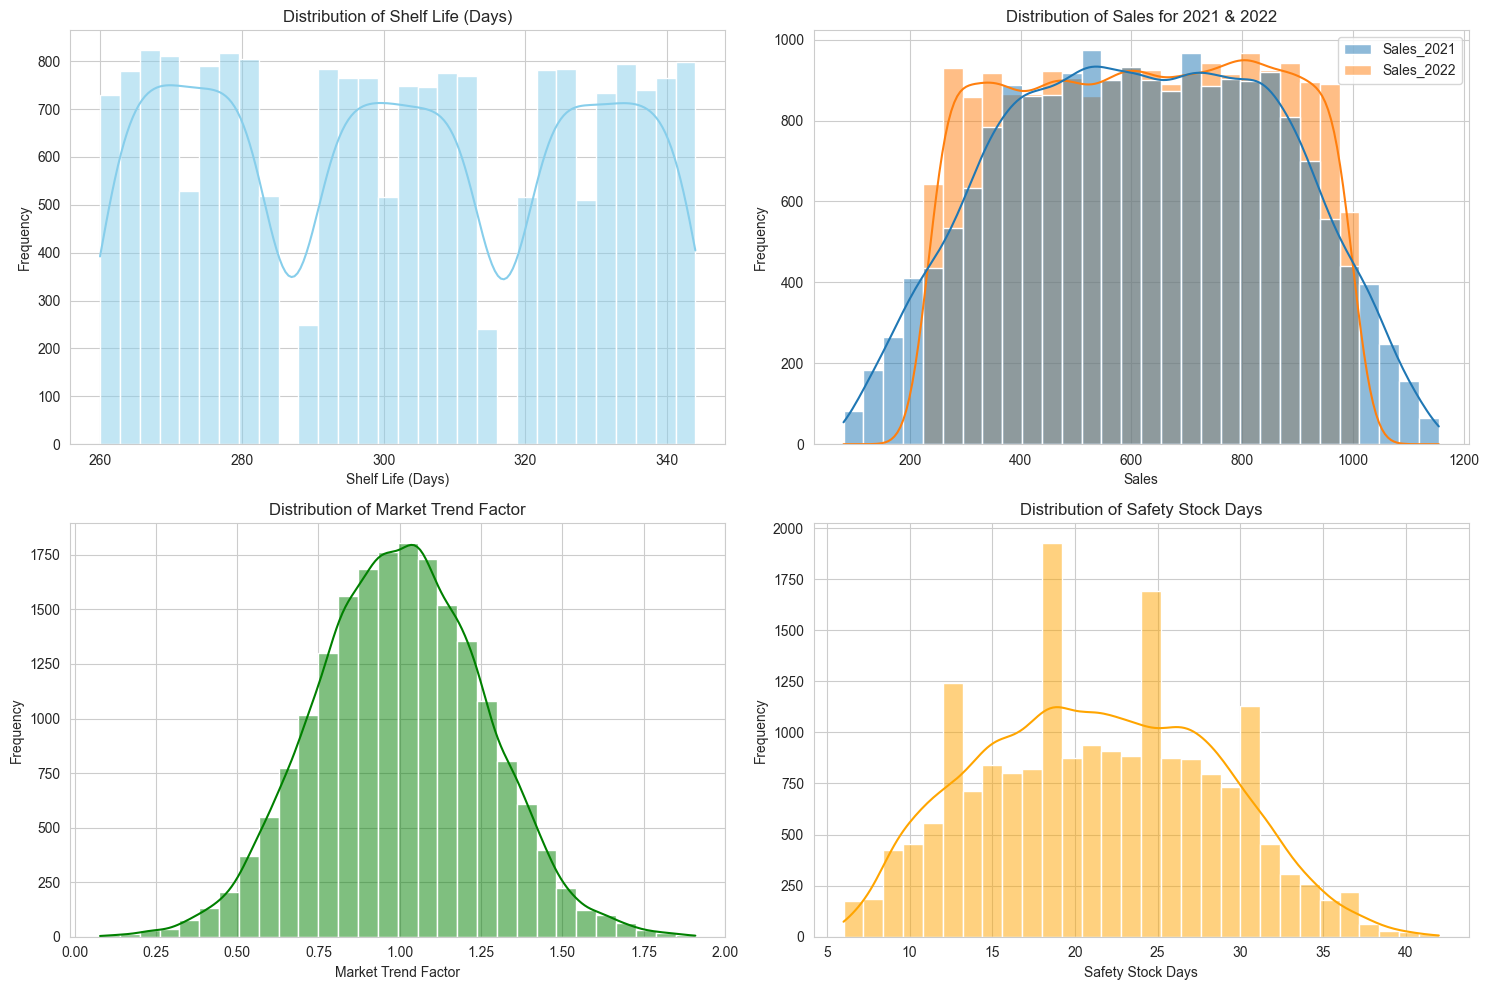

In [7]:
# Set the style for the plots
sns.set_style("whitegrid")

# Initialize a figure with subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the distribution of Shelf Life in Days
# kde = `True` because we want a Kernel Density Estimation that helps us plot a
# smooth line above the histogram plots, that estimates the distribution of the
# data.
sns.histplot(df['Shelf_Life_Days'], bins=30, ax=ax[0, 0], color='skyblue', kde=True)
ax[0, 0].set_title('Distribution of Shelf Life (Days)')
ax[0, 0].set_xlabel('Shelf Life (Days)')
ax[0, 0].set_ylabel('Frequency')

# Plotting the distribution of Sales in 2021 and 2022
sns.histplot(df[['Sales_2021', 'Sales_2022']], bins=30, ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of Sales for 2021 & 2022')
ax[0, 1].set_xlabel('Sales')
ax[0, 1].set_ylabel('Frequency')

# Plotting the distribution of Market Trend Factor
sns.histplot(df['Market_Trend_Factor'], bins=30, ax=ax[1, 0], color='green', kde=True)
ax[1, 0].set_title('Distribution of Market Trend Factor')
ax[1, 0].set_xlabel('Market Trend Factor')
ax[1, 0].set_ylabel('Frequency')

# Plotting the distribution of Safety Stock Days
sns.histplot(df['Safety_Stock_Days'], bins=30, ax=ax[1, 1], color='orange', kde=True)
ax[1, 1].set_title('Distribution of Safety Stock Days')
ax[1, 1].set_xlabel('Safety Stock Days')
ax[1, 1].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()


As seen from the plots, there are a few observations from:
- the distribution of `Shelf_Life_Days`: The values seem to be concentrated around 260-280, 290-310, and 320-340.
- the distribution of `Sales_2021` and `Sales_2022`: The total sales for 2021 or 2022 per product varies between 200 and 1,000 in most cases. There seem to be outliers also, some products sales for either year as 100, or as high as 1,100 to 1,200.
- the distribution of `Market_Trend_Factor`: The Market Trend Factor varies from around 0.0 to 2.0. It also seems to follow a normal distribution.
- the distribution of `Safety_Stock_Days`: The Safety Stock Days varies between about 6 to 40. From the spikes in the plot, a huge number of products have Safety Stock Days of around 12, 19, 25, and 30.

Next, we will move on the distibution of the categorical variables, which include:
- `Compliance_Status`,
- `Manufacturing_Location`,
- `Product_Category`,
- `Storage_Location`.

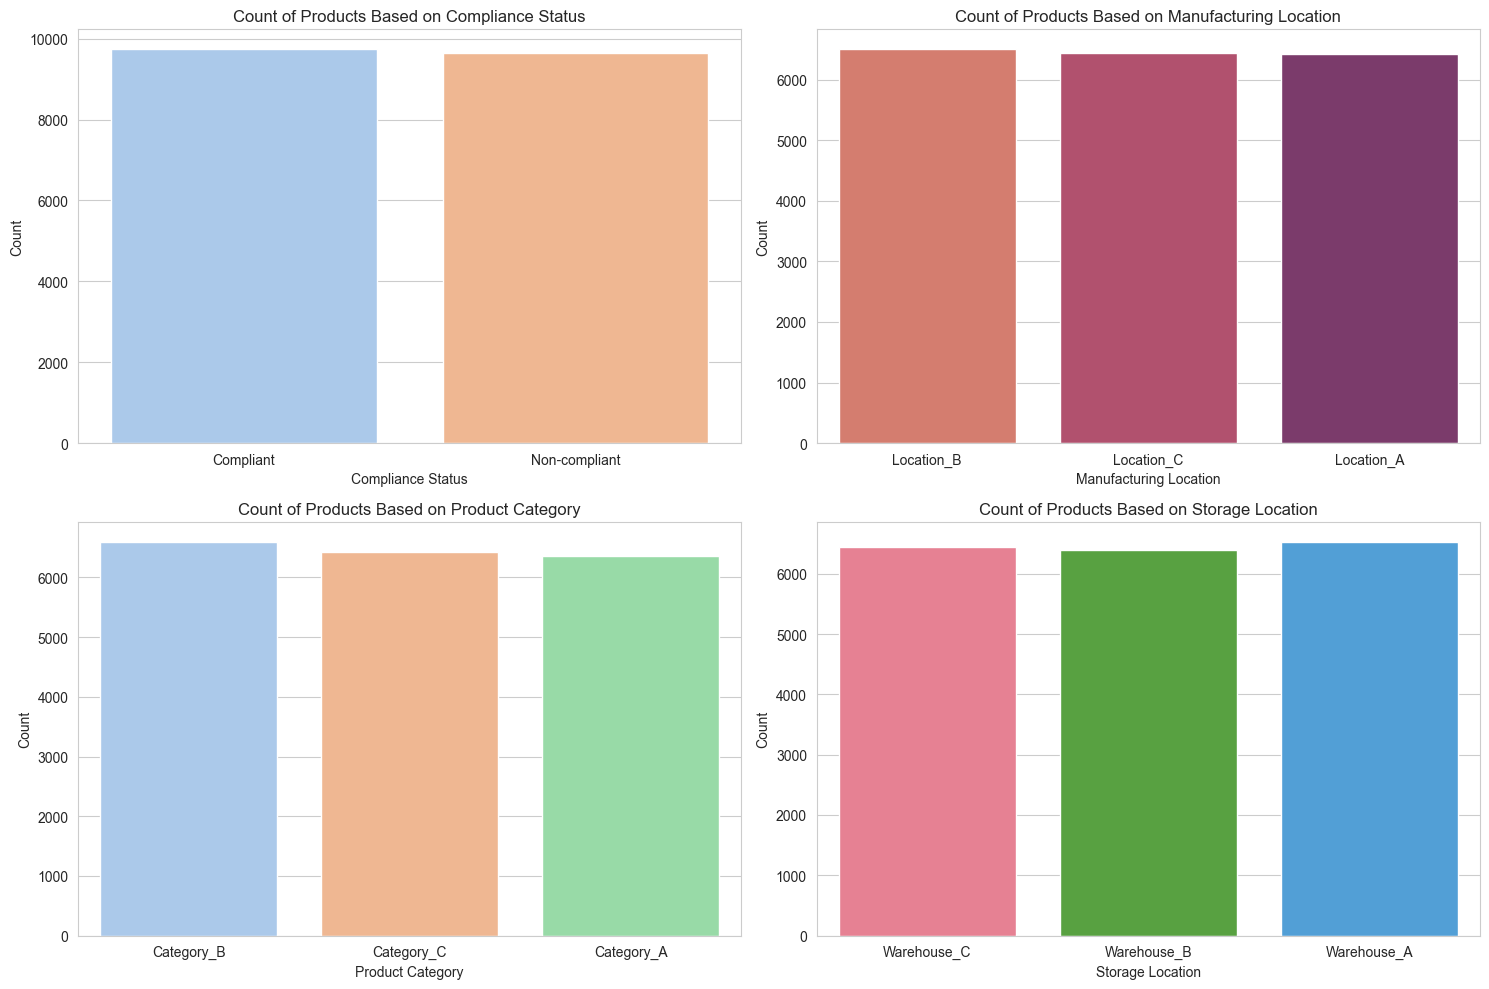

In [8]:
# Initialize a figure with subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the distribution of Compliance Status
sns.countplot(data=df, x='Compliance_Status', ax=ax[0, 0], palette="pastel")
ax[0, 0].set_title('Count of Products Based on Compliance Status')
ax[0, 0].set_xlabel('Compliance Status')
ax[0, 0].set_ylabel('Count')

# Plotting the distribution of Manufacturing Location
sns.countplot(data=df, x='Manufacturing_Location', ax=ax[0, 1], palette="flare")
ax[0, 1].set_title('Count of Products Based on Manufacturing Location')
ax[0, 1].set_xlabel('Manufacturing Location')
ax[0, 1].set_ylabel('Count')

# Plotting the distribution of Product Category
sns.countplot(data=df, x='Product_Category', ax=ax[1, 0], palette="pastel")
ax[1, 0].set_title('Count of Products Based on Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Count')

# Plotting the distribution of Storage Location
sns.countplot(data=df, x='Storage_Location', ax=ax[1, 1], palette="husl")
ax[1, 1].set_title('Count of Products Based on Storage Location')
ax[1, 1].set_xlabel('Storage Location')
ax[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

From the plot seen above,
- Count of Products based on `Compliance_Status`: There is an equivalent number of products that are Compliant and those that are Not-compliant with regulation. The difference isn't significance at all.
- Count of Products based on `Manufacturing_Location`: There is also an equivalent number of products that have been manufactured in each of the three locations `Location_A`, `Location_B` and `Location_C`.
- Count of Products based on `Product_Category`: Although not very significant, there seem to be slightly more products that belong to `Category_B` than there are in `Category_C` and `Category_A`.
- Count of Products based on `Storage_Location`: There are slightly less number of individual products stored in `Warehouse_A` than `Warehouse_B` and `Warehouse_C`.

### 2.2. Bivariate Analysis

Here, we look at the distribution between two variables in the dataset to see if there are patterns or structures that we can identify. This should tell us more about how multiple variables are related.

This section will follow this pattern:
- **Sales against Categorical Variables**: Look at Sales for 2021 and 2022 as they relate to other categorical variables,
- **Sales against Numerical Variables**: Look at Sales for 2021 and 2022 as they relate to other numerical variables,
- **Sales for 2021 and 2022**: Look at how Sales for 2021 and Sales for 2022 relate with each other,
- **Other Pairs of Variables**: Look at other variables as they relate with each other.

#### 2.2.1. Bivariate Analysis: Sales against Categorical Variables

We will begin by look at 2021 sales (`Sales_2021`) and 2022 sales (`Sales_2022`) against some of the categorical variables like:
- `Compliance_Status`,
- `Manufacturing_Location`,
- `Product_Category`,
- `Storage_Location`.

Let's look at the `Sales_2021` against these variables.

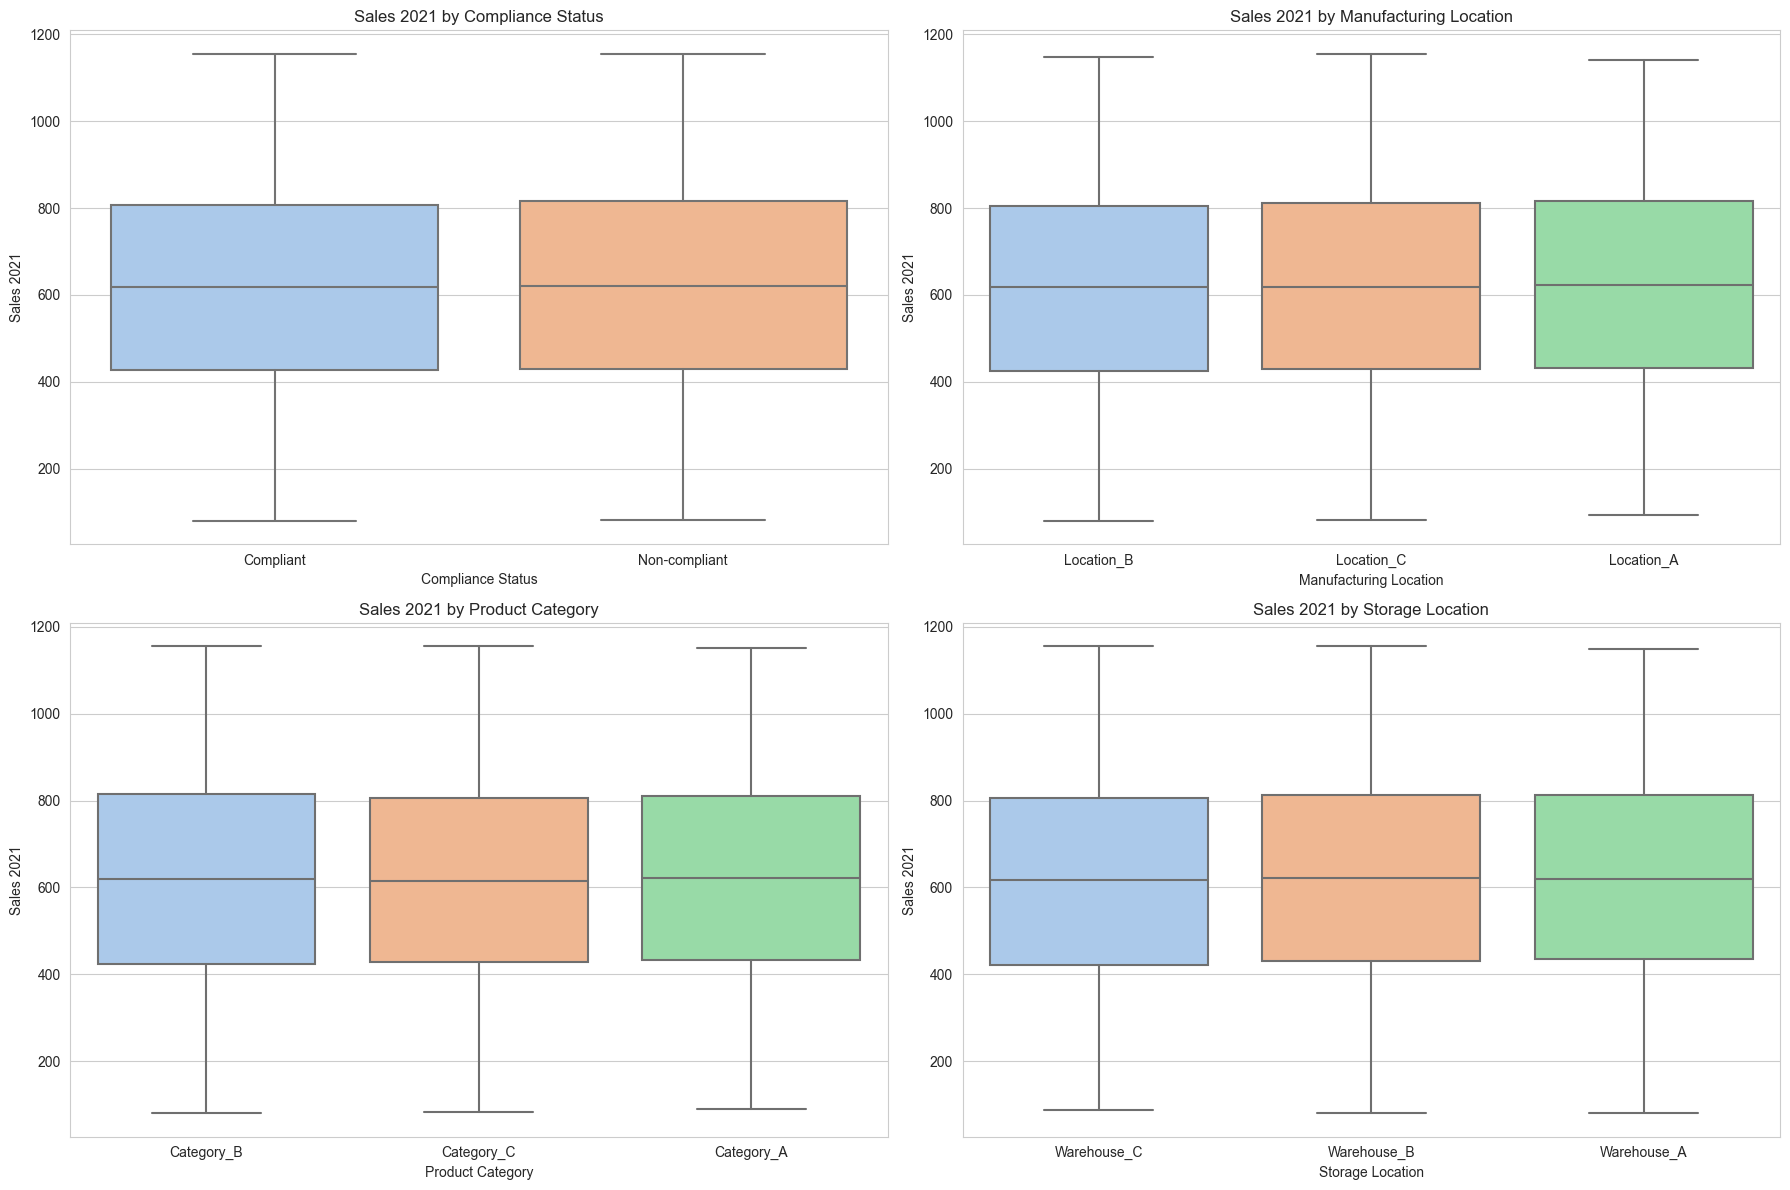

In [9]:
# Initialize a new figure for the visualizations
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Boxplots for Sales 2021 based on Compliance Status
sns.boxplot(data=df, x='Compliance_Status', y='Sales_2021', ax=ax[0, 0], palette="pastel")
ax[0, 0].set_title('Sales 2021 by Compliance Status')
ax[0, 0].set_xlabel('Compliance Status')
ax[0, 0].set_ylabel('Sales 2021')

# Boxplots for Sales 2021 based on Manufacturing Location
sns.boxplot(data=df, x='Manufacturing_Location', y='Sales_2021', ax=ax[0, 1], palette="pastel")
ax[0, 1].set_title('Sales 2021 by Manufacturing Location')
ax[0, 1].set_xlabel('Manufacturing Location')
ax[0, 1].set_ylabel('Sales 2021')


# Boxplots for Sales 2021 based on Product Category
sns.boxplot(data=df, x='Product_Category', y='Sales_2021', ax=ax[1, 0], palette="pastel")
ax[1, 0].set_title('Sales 2021 by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Sales 2021')


# Boxplots for Sales 2021 based on Storage Location
sns.boxplot(data=df, x='Storage_Location', y='Sales_2021', ax=ax[1, 1], palette="pastel")
ax[1, 1].set_title('Sales 2021 by Storage Location')
ax[1, 1].set_xlabel('Storage Location')
ax[1, 1].set_ylabel('Sales 2021')

# Adjust the layout
plt.tight_layout()
plt.show()


As seen from the plots:
- `Sales_2021` by `Compliance_Status`: There doesn't seem to be any significant difference in sales by compliance status of the pharmaceutical product, although the `Non-compliant` products have a slightly higher sales range than the `Compliant` product.
- `Sales_2021` by `Manufacturing_Location`: There is no significant difference in the distribution of sales for 2021, between the different manufacturing locations.
- `Sales_2021` by `Product_Category`: There is no visibile difference in the distribution of sales for 2021, between the different product categories.
- `Sales_2021` by `Storage_Location`: The difference in the distribution of sales for 2021, does not vary significantly across different storage locations/warehouses.

Next, we want to see the same distributions, but for `Sales_2022`.

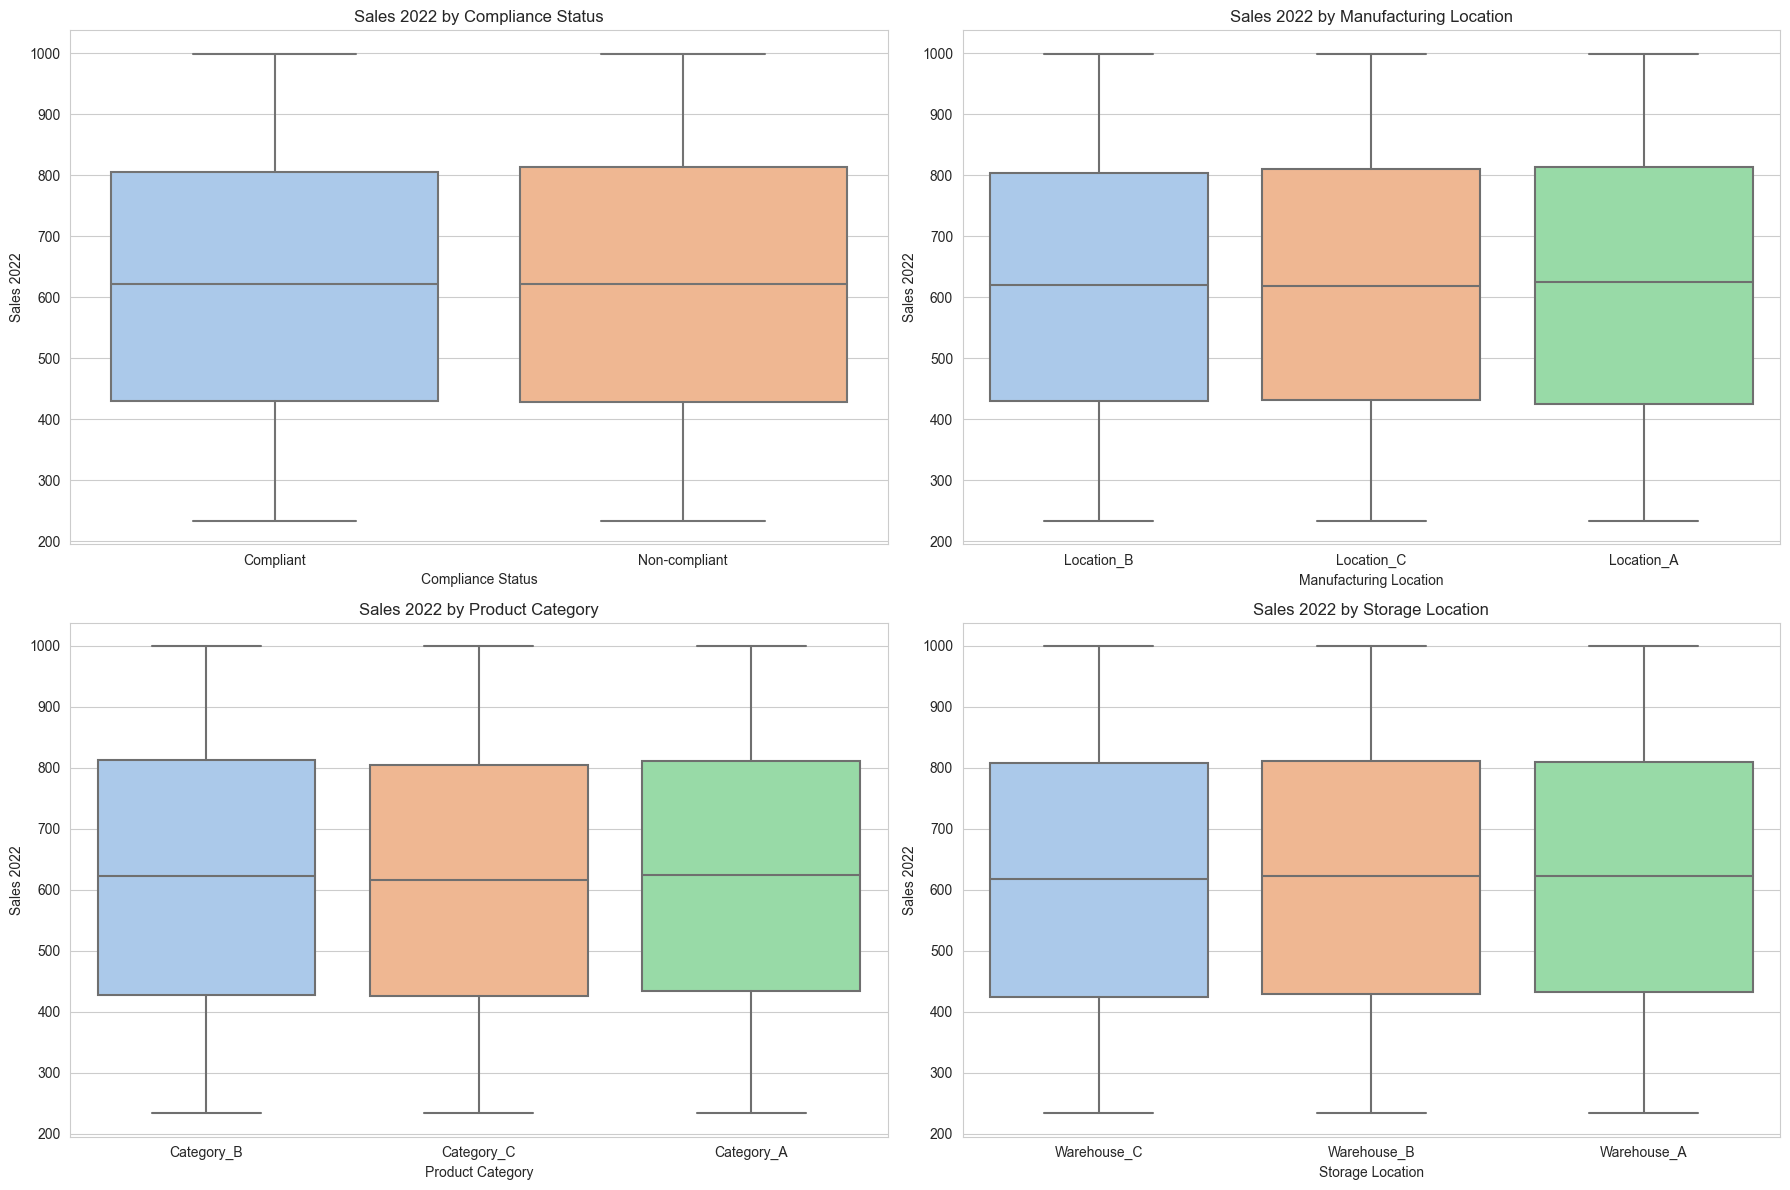

In [10]:
# Initialize a new figure for the visualizations
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Boxplots for Sales 2022 based on Compliance Status
sns.boxplot(data=df, x='Compliance_Status', y='Sales_2022', ax=ax[0, 0], palette="pastel")
ax[0, 0].set_title('Sales 2022 by Compliance Status')
ax[0, 0].set_xlabel('Compliance Status')
ax[0, 0].set_ylabel('Sales 2022')

# Boxplots for Sales 2022 based on Manufacturing Location
sns.boxplot(data=df, x='Manufacturing_Location', y='Sales_2022', ax=ax[0, 1], palette="pastel")
ax[0, 1].set_title('Sales 2022 by Manufacturing Location')
ax[0, 1].set_xlabel('Manufacturing Location')
ax[0, 1].set_ylabel('Sales 2022')


# Boxplots for Sales 2022 based on Product Category
sns.boxplot(data=df, x='Product_Category', y='Sales_2022', ax=ax[1, 0], palette="pastel")
ax[1, 0].set_title('Sales 2022 by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Sales 2022')


# Boxplots for Sales 2022 based on Storage Location
sns.boxplot(data=df, x='Storage_Location', y='Sales_2022', ax=ax[1, 1], palette="pastel")
ax[1, 1].set_title('Sales 2022 by Storage Location')
ax[1, 1].set_xlabel('Storage Location')
ax[1, 1].set_ylabel('Sales 2022')

# Adjust the layout
plt.tight_layout()
plt.show()


There aren't a lot of differences between the distribution for `Sales_2021` and `Sales_2022`, and all of these variables we just compared them with. The only major differences that should be noted is that the range of values for `Sales_2021` were between roughly 50 to 1,200, and the range of values for `Sales_2022` were between roughly 200 to 1,000. One could speculate that sales volume may have dropped significantly (roughly 20% to go from 1,200 to 1,000), but this is still a speculation.

#### 2.2.2. Bivariate Analysis: Sales against Numerical Variables

Here, we will look at `Sales_2021` and `Sales_2022` against some other numerical variables in the dataset. The numerical variables include:

- `Shelf_Life_Days`,
- `Market_Trend_Factor`.

We begin with `Sales_2021`, `Sales_2022` and `Shelf_Life_Days`.

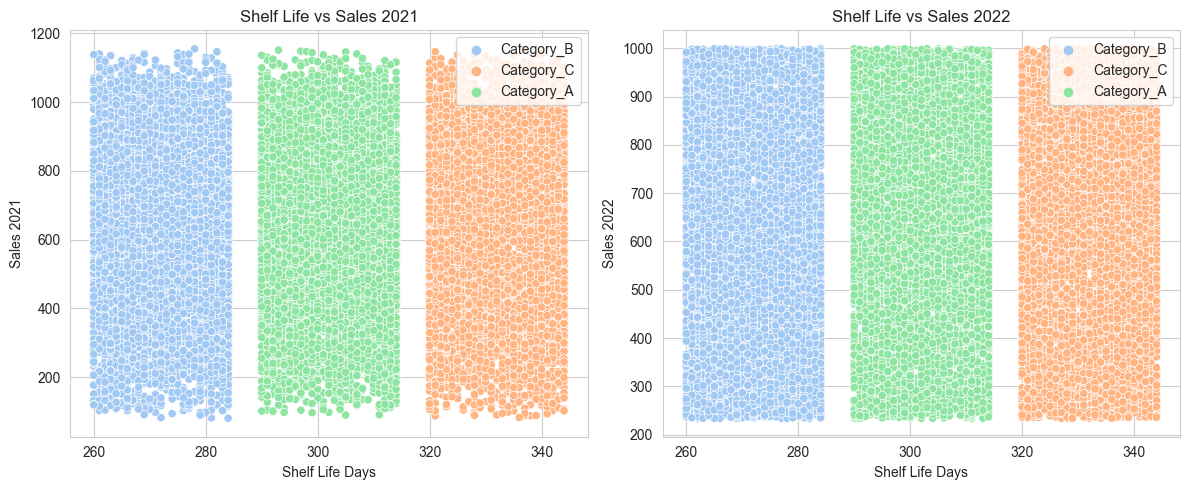

In [11]:
# Initialize a new figure for the visualizations
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Shelf Life Days against Sales 2021
sns.scatterplot(data=df, x='Shelf_Life_Days', y='Sales_2021', ax=ax[0], hue='Product_Category', palette="pastel")
ax[0].set_title('Shelf Life vs Sales 2021')
ax[0].set_xlabel('Shelf Life Days')
ax[0].set_ylabel('Sales 2021')
ax[0].legend(loc='upper right')

# Shelf Life Days against Sales 2022
sns.scatterplot(data=df, x='Shelf_Life_Days', y='Sales_2022', ax=ax[1], hue='Product_Category', palette="pastel")
ax[1].set_title('Shelf Life vs Sales 2022')
ax[1].set_xlabel('Shelf Life Days')
ax[1].set_ylabel('Sales 2022')
ax[1].legend(loc='upper right')

# Adjust plot
plt.tight_layout()
plt.show()

As seen from both plots above,
- there is a clear distinction in the range of values between the shelf life of products in `Category_A` (around 290 to 315), `Category_B` (around 260 to 285) and `Category_C` (around 320 to 345).
- there doesn't seem to be any direct correlation between sales for either years and the product category.

Next we look at `Sales_2021`, `Sales_2022` and `Market_Trend_Factor` by plotting:
- `Market_Trend_Factor` against `Sales_2021`,
- `Market_Trend_Factor` against `Sales_2022`,
- `Market_Trend_Factor` against the difference between `Sales_2021` and `Sales_2022`.

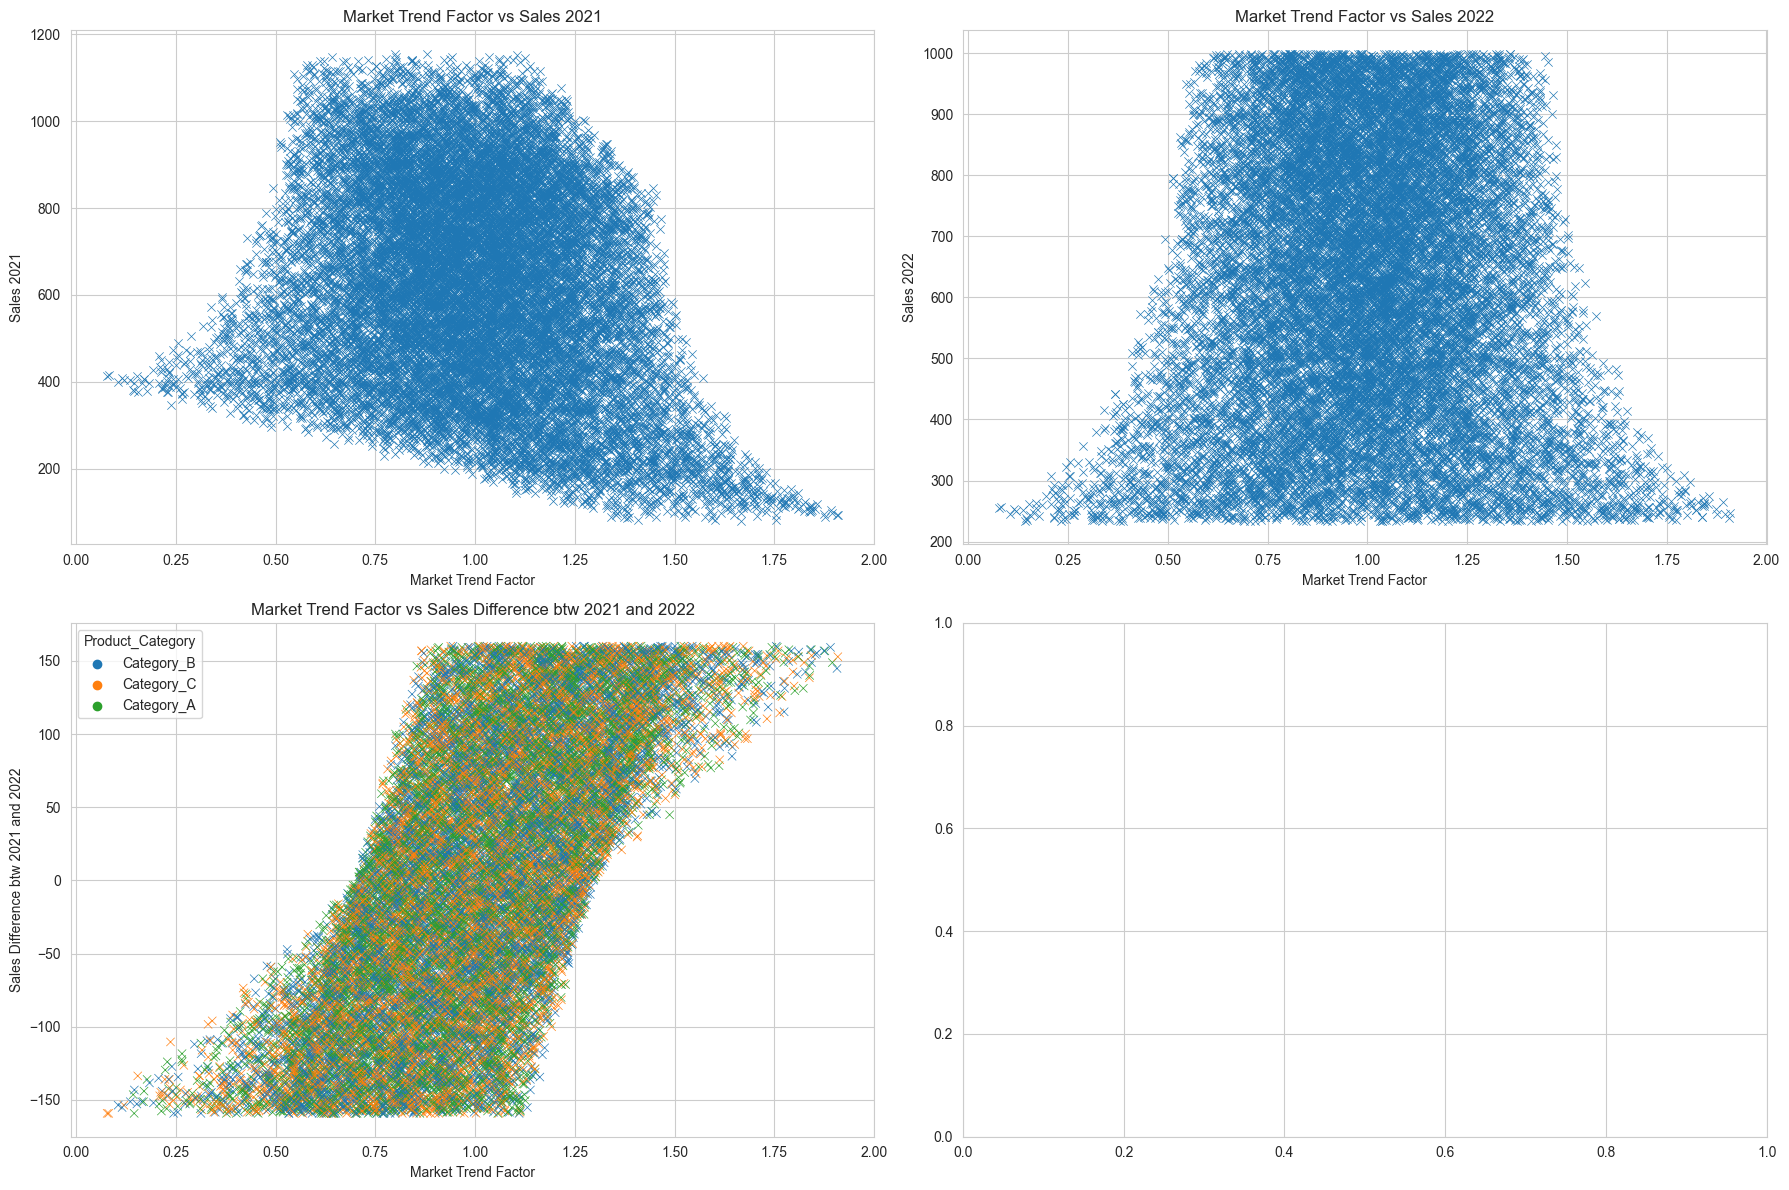

In [12]:
# Initialize a new figure for the visualizations
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Market Trend Factor against Sales 2021
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2021', ax=ax[0, 0], marker='x')
ax[0, 0].set_title('Market Trend Factor vs Sales 2021')
ax[0, 0].set_xlabel('Market Trend Factor')
ax[0, 0].set_ylabel('Sales 2021')

# Market Trend Factor against Sales 2022
sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2022', ax=ax[0, 1], marker='x')
ax[0, 1].set_title('Market Trend Factor vs Sales 2022')
ax[0, 1].set_xlabel('Market Trend Factor')
ax[0, 1].set_ylabel('Sales 2022')

# Market Trend Factor against difference between Sales 2022 and Sales 2021
df['Sales_2022-Sales_2021'] = df['Sales_2022'] - df['Sales_2021'] # Create difference

sns.scatterplot(data=df, x='Market_Trend_Factor', y='Sales_2022-Sales_2021', ax=ax[1, 0], marker='x', hue='Product_Category')
ax[1, 0].set_title('Market Trend Factor vs Sales Difference btw 2021 and 2022')
ax[1, 0].set_xlabel('Market Trend Factor')
ax[1, 0].set_ylabel('Sales Difference btw 2021 and 2022')

df = df.drop(columns=['Sales_2022-Sales_2021']) # Drop difference

# Adjust plot
plt.tight_layout()
plt.show()

As seen,
- `Market_Trend_Factor` against `Sales_2021`: There doesn't seem to be any clear correlation or pattern between the `Market_Trend_Factor` and `Sales_2021`,
- `Market_Trend_Factor` against `Sales_2022`: There doesn't seem to be any clear correlation or pattern between the `Market_Trend_Factor` and `Sales_2022`,
- `Market_Trend_Factor` against difference between `Sales_2022` and `Sales_2021`: There seem to be some level of correlation between them. Lower values of Market Trend Factor seem to with when the sales difference is negative, and vice versa. This may indicate that the Market Trend Factor, to some extent has something to do with how the quantity sold change between 2021 and 2022.

#### 2.2.3. Bivariate Analysis: Sales for 2021 and 2022

We will now also look at `Sales_2021` against `Sales_2022` and how they relate with each other. The coloring will be based on the `Product_Category`.

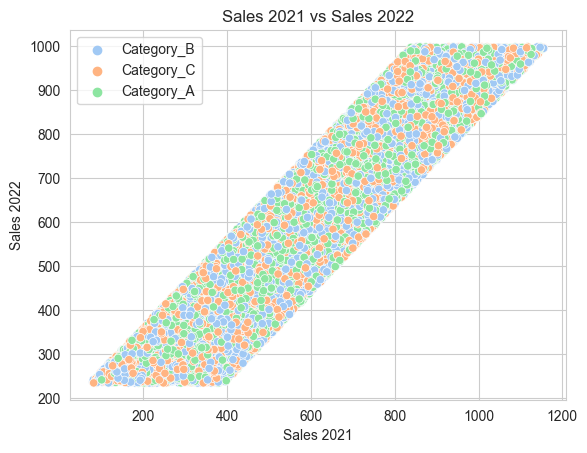

In [13]:
# Plot Sales_2021 against Sales_2022, colored by the product category
sns.scatterplot(data=df, x='Sales_2021', y='Sales_2022', hue='Product_Category', palette="pastel")
plt.title('Sales 2021 vs Sales 2022')
plt.xlabel('Sales 2021')
plt.ylabel('Sales 2022')
plt.legend(loc='upper left')
plt.show()

As seen, there is a very visible pattern between sales for `Sales_2021` and `Sales_2022`. This plot may indicate that there is some form of linear relationship between `Sales_2021` and `Sales_2022`.

#### 2.2.4. Bivariate Analysis: Other Pairs of Variables

We want to now look at the relationship between other pairs of variables.

We will now take a look at each product category (`Product_Category`), to see if there is some relationship between:
- the product categories and the market trend (`Market_Trend_Factor`),
- the product categories and the shelf life (`Shelf_Life_Days`) of the product,
- the product categories and the safety stock days (`Safety_Stock_Days`).

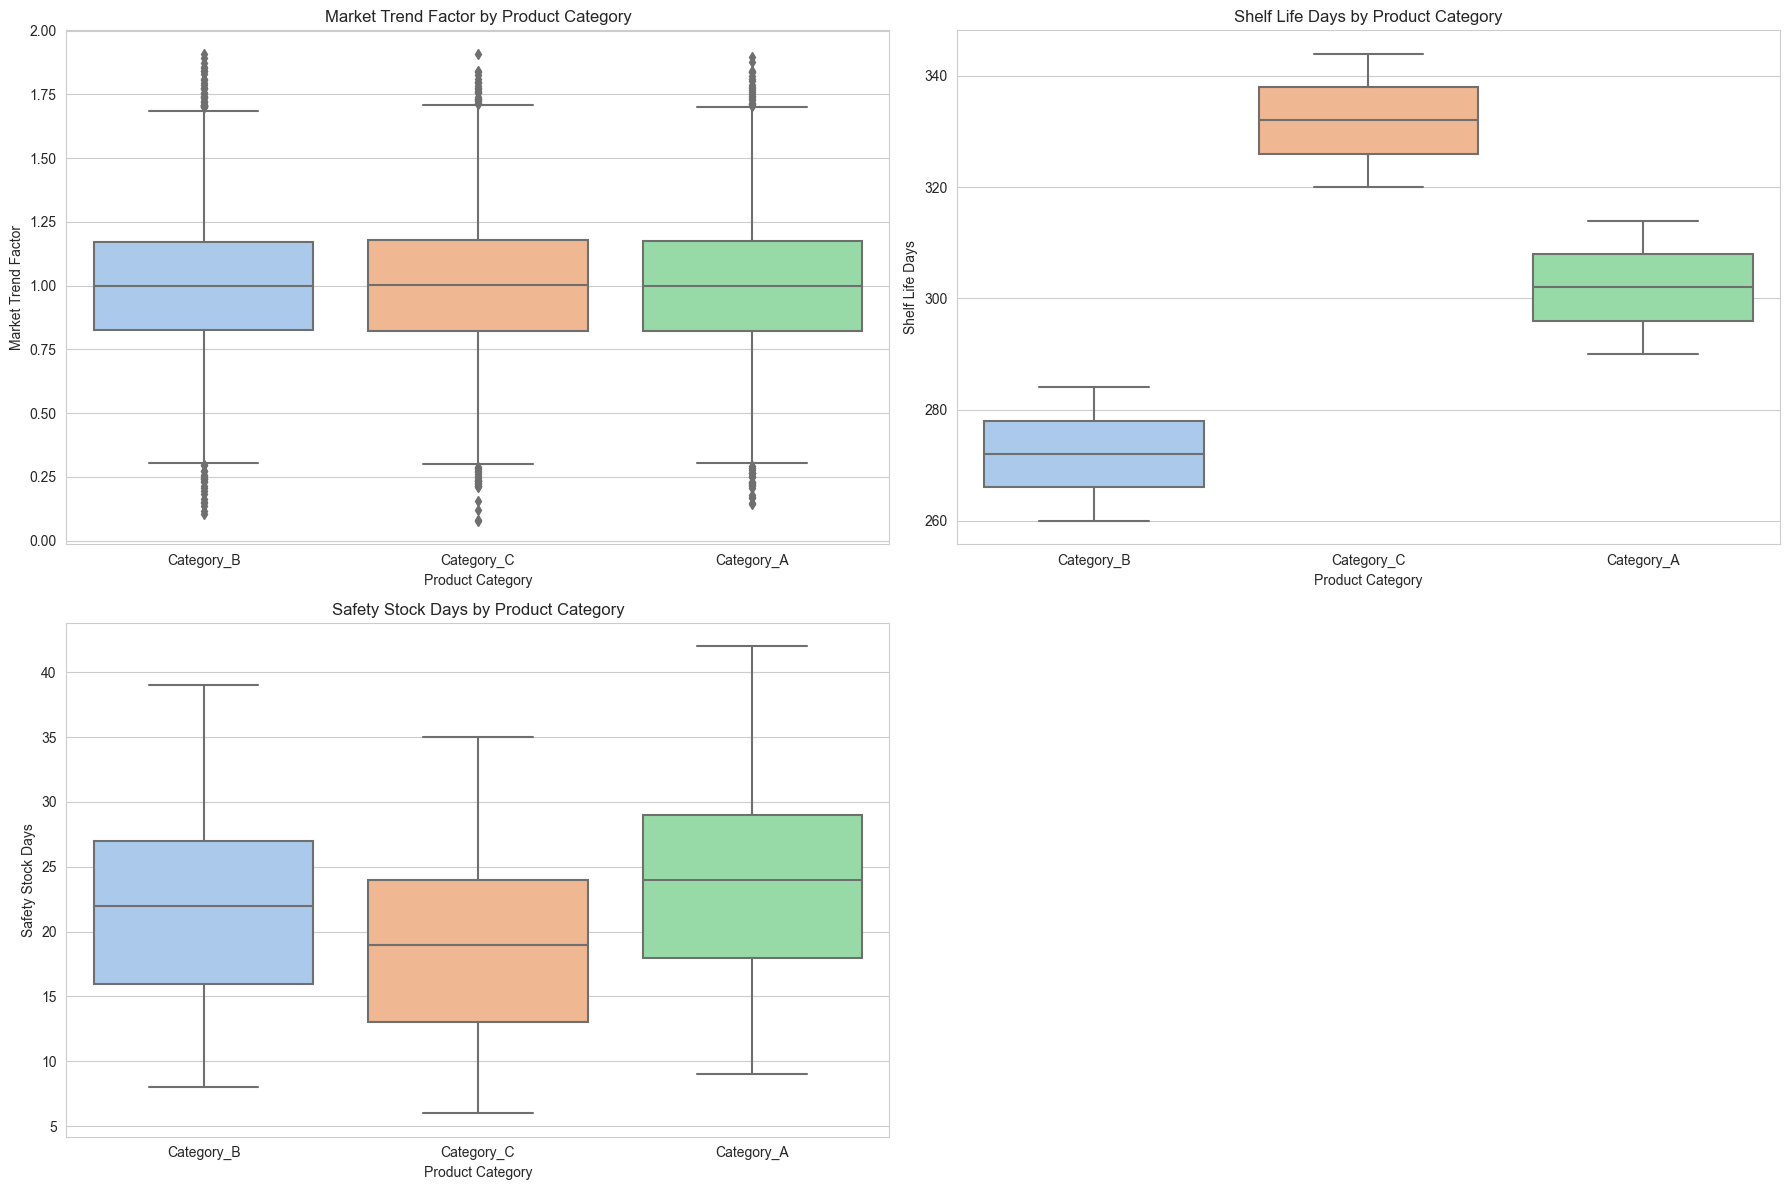

In [14]:
# Initialize a new figure for the visualizations
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Boxplots for Market Trend Factor based on Product Category
sns.boxplot(data=df, x='Product_Category', y='Market_Trend_Factor', ax=ax[0, 0], palette="pastel")
ax[0, 0].set_title('Market Trend Factor by Product Category')
ax[0, 0].set_xlabel('Product Category')
ax[0, 0].set_ylabel('Market Trend Factor')

# Boxplots for Shelf Life Days based on Product Category
sns.boxplot(data=df, x='Product_Category', y='Shelf_Life_Days', ax=ax[0, 1], palette="pastel")
ax[0, 1].set_title('Shelf Life Days by Product Category')
ax[0, 1].set_xlabel('Product Category')
ax[0, 1].set_ylabel('Shelf Life Days')

# Boxplots for Safety Stock Days based on Product Category
sns.boxplot(data=df, x='Product_Category', y='Safety_Stock_Days', ax=ax[1, 0], palette="pastel")
ax[1, 0].set_title('Safety Stock Days by Product Category')
ax[1, 0].set_xlabel('Product Category')
ax[1, 0].set_ylabel('Safety Stock Days')

# Remove unused axis
ax[1, 1].remove()

# Adjust the layout
plt.tight_layout()
plt.show()


As seen,

- `Market_Trend_Factor` by `Product_Category`: Each of the products seem to have an equivalent distribution of the `Market_Trend_Factor`.
- `Shelf_Life_Days` by `Product_Category`: Products in `Category_C` and `Category_A` have the highest range of product shelf life, which are 320 to 345 and 290 to 320 respectively. While products in `Category_B` have a shelf life that range from 260 to 290. This indicates that products in `Category_C` can be stored for longer than products in `Category_A`, and products in `Category_A` last longer than products in `Category_B`.
- `Safety_Stock_Days` by `Product_Category`: Products in `Category_A` have higher safety stock days than other products, with an interquartile range of about 17 to 30. Products in `Category_B` have the second highest values, which fall between 16 and 27 in the interquartile range. And products in `Category_C` have the lowest range of values, around 13 and 24 in the interquartile range. This indicates that the company stocks products for `Category_A` to be sold for longer periods than for the other products in `Category_B` and `Category_C`.

## 3. Demand Forecasting and Inventory Optimization

We're going to be approaching this problem, knowing that there is very limited information in the dataset, like comprehensive sales data over the years. So, we'll have to try out new techniques at solving this company's problem.

In doing this, we will be forecasting sales for the year 2023, and also estimating parameters that will help the company to optimize inventory. We will approach this in two ways:
- first approach; we use the `Market_Trend_Factor` to estimate sales for 2023, and then estimate the **Safety Stock** and **Optimal Inventory** needed for 2023. This is a good approach if your business dataset or usecase has some other external parameter that indicates some long or short term sales trend like `Market_Trend_Factor` (or some micro or macro economic indicators) that we have here.
- second approach; we use a linear projection to estimate sales for 2023 using data for 2021 and 2022, and then estimate the **Safety Stock** and **Optimal Inventory** needed for 2023. This is another way to approach this problem if your dataset or usecase doesn't have any other external parameter like `Market_Trend_Factor` (or some micro or macro economic indicators) that can give an indication of the long or short term trend of the market.

### 3.1. Demand Forecasting and Inventory Optimization: Using Market Trend Factor

#### 3.1.1. Feature Engineering

We will begin by estimating the projected total sales for 2023 using `Market_Trend_Factor`. From the plots we made for Sales against Market Trend Factor, we know that it seems to correlate with the change in sales between sales in 2022 and sales in 2021. Also/hence, the Market Trend Factor should indicate the direction of the market, and so that the Market Trend Factor should play a significant role in the sales for 2023 for each product category.

We are going to be estimating the projected sales for 2023 based on the current sales for 2022 and market trend factor (`Sales_2022` and `Market_Trend_Factor`).

Calculate projected sales trend for 2023 based on the sales of 2022 and the `Market_Trend_Factor`. Assuming the trend factor applies linearly, we can calculate the projected sales for 2023 as:

$Projected\_Sales\_2023 = Sales\_2022 * Market\_Trend\_Factor$

In [15]:
# Make a copy of the dataset
df_mtf = df.copy()

# Calculate projected sales trend for 2023 using Market Trend Factor
df_mtf['Projected_Sales_2023'] = df_mtf['Sales_2022'] * df_mtf['Market_Trend_Factor']

# Clip the results to have a lower bounds of zero
df_mtf['Projected_Sales_2023'] = df_mtf['Projected_Sales_2023'].apply(lambda x: x if x >= 0 else 0)

Next, we encode the categorical columns to numerical values using `LabelEncoder`.

In [16]:
# List the columns to encode
cols = ['Compliance_Status', 
        'Supplier_ID', 
        'Manufacturing_Location', 
        'Product_Category', 
        'Storage_Location']

# Store the encoders
label_encoders = {}

# Loop through the columns and encode individually
for column in cols:

    # Define the encoder and encode the column
    le = LabelEncoder()
    df_mtf[column] = le.fit_transform(df_mtf[column])

    # Save the encoder
    label_encoders[column] = le

Now, let's view the updated data with the newly encoded features.

In [17]:
df_mtf.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,493.935278
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,335.512507
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,938.857721
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,684.538694
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,452.625369


We will now define the variables we want to use to build a model that can directly estimate the `Projected_Sales_2023`.

In [18]:
# Define the features
X = df_mtf[['Shelf_Life_Days', 
        'Sales_2021', 
        'Sales_2022', 
        'Market_Trend_Factor', 
        'Compliance_Status',
        'Supplier_ID', 
        'Manufacturing_Location', 
        'Product_Category', 
        'Safety_Stock_Days', 
        'Storage_Location']]

# Define the target
y = df_mtf['Projected_Sales_2023']

We will split our data into two sets, train and test sets (70% train, 30% test).

In [19]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

#### 3.1.2. Demand Forecasting

Here, we directly build a model to project the sales for 2023 for each unique product using `DecisionTreeClassifier`.

In [20]:
# Initialize and train the DecisionTree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict the sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 6.1643348311671184
RMSE: 8.33757187540258
MAPE: 1.1861491728532438


The model we built can directly esimate the projected sales for 2023 with a good amount of accuracy, since the errors are low.

#### 3.1.3. Inventory Optimization

Here, we are going to try to estimate the necessary parameters needed to optimize inventory for the year 2023 given our previous model we built. 

First we get the average daily sales of each product over the last two years. Since there are 365 days in a year, we can get the average daily sales by dividing the sum of the total sales over the last two years by 2 * 365.

In [21]:
# Calculate average daily sales for previous years
df_mtf['Average_Daily_Sales'] = (df_mtf['Sales_2021'] + df_mtf['Sales_2022']) / (2 * 365)

To reiterate, Safety Stock Days (`Safety_Stock_Days`) is basically the number of days of inventory that is kept in stock to ensure that deman can be met even during unexpected events.

Since we know the Safety Stock Days on average for each product, we can estimate the actual quantity of this stock (which we will call **Safety Stock**) by multiplying the `Safety_Stock_Days` by the `Average_Daily_Sales`.

In [22]:
# Calculate the safety stock
df_mtf['Safety_Stock'] = df_mtf['Safety_Stock_Days'] * df_mtf['Average_Daily_Sales']

If the company is to stock for the entire year on the 1st of January 2023, then it should stock optimally, and even add some cushion in case there is unexpected increase in demand. This cushion/unexapected increase in demand is covered by the `Safety_Stock` being kept.

So, its optimal inventory for 2023 should be the sum of the **Projected Sales for 2023** and the **Safety Stock**.

In [23]:
# Calculate the optimal inventory level for 2023
df_mtf['Optimal_Inventory_2023'] = df_mtf['Projected_Sales_2023'] + df_mtf['Safety_Stock']

But again, if the company is to stock for the entire year on the 1st of January 2023, the company should not expect to stock for goods longer than shelf life.

So, we have the use the **Shelf Life** of the products to also limit how much should be kept in inventoy for **2023**.

In [24]:

# Ensure that the optimal inventory doesn't exceed the shelf life
df_mtf['Optimal_Inventory_2023'] = df_mtf.apply(lambda row: min(row['Optimal_Inventory_2023'], 
                                                        row['Shelf_Life_Days'] * row['Average_Daily_Sales']), axis=1)

### 3.2. Demand Forecasting and Inventory Optimization: Linear Projection

#### 3.2.1. Feature Engineering

we use a linear projection to estimate sales for 2023 using data for 2021 and 2022, and then estimate the **Safety Stock** and **Optimal Inventory** needed for 2023. This is another way to approach this problem if your dataset or usecase doesn't have any other external parameter like `Market_Trend_Factor` that can give an indication of the long or short term trend of the market.

We will begin by estimating the projected total sales for 2023 using linear projection. From the plots we made for Sales in 2021 (`Sales_2021`) against sales in 2022 (`Sales_2022`), we know that there is a linear relationship between them. We're going to extend this linear relationship to project for 2023.

We are going to be estimating the projected sales for 2023 based on the current sales for 2021 (`Sales_2021`) and sales for 2022 (`Sales_2022`).

Calculate projected sales trend for 2023 based on the sales for 2021 (`Sales_2021`) and sales for 2022 (`Sales_2022`). Assuming the linear trend continues, we can calculate the projected sales for 2023 as:

$Projected\_Sales\_2023 = Sales\_2021 + Slope * (2023 - 2021)$

Hence,

$Projected\_Sales\_2023 = Sales\_2021 + 2 * Slope$

Where $Slope$ is given as:

$Slope = \frac{Sales\_2022 - Sales\_2021}{2022 - 2021} = Sales\_2022 - Sales\_2021$

In [25]:
# Make a copy of the dataset first
df_lp = df.copy()

# Calculate the Slope 
slope = df['Sales_2022'] - df['Sales_2021']

# Calculate projected sales trend for 2023 using a Linear Projection
df_lp['Projected_Sales_2023'] = df_lp['Sales_2021']  + 2 * slope

# Clip the results to have a lower bounds of zero
df_lp['Projected_Sales_2023'] = df_lp['Projected_Sales_2023'].apply(lambda x: x if x >= 0 else 0)

Next, we encode the categorical columns to numerical values using `LabelEncoder`.

In [26]:
# List the columns to encode
cols = ['Compliance_Status', 
        'Supplier_ID', 
        'Manufacturing_Location', 
        'Product_Category', 
        'Storage_Location']

# Store the encoders
label_encoders = {}

# Loop through the columns and encode individually
for column in cols:

    # Define the encoder and encode the column
    le = LabelEncoder()
    df_lp[column] = le.fit_transform(df_lp[column])

    # Save the encoder
    label_encoders[column] = le

Now, let's view the updated data with the newly encoded features.

In [27]:
df_lp.head()

,Product_ID,Shelf_Life_Days,Sales_2021,Sales_2022,Market_Trend_Factor,Compliance_Status,Supplier_ID,Manufacturing_Location,Product_Category,Safety_Stock_Days,Storage_Location,Projected_Sales_2023
0,Product_1,277,602.6,545,0.906303,0,2,1,1,22,2,487.4
1,Product_2,343,359.4,345,0.972500,0,0,2,2,24,2,330.6
2,Product_3,291,983.0,915,1.026074,1,5,2,0,24,1,847.0
3,Product_4,298,789.4,751,0.911503,0,8,2,0,20,1,712.6
4,Product_5,260,326.8,430,1.052617,0,1,0,1,21,0,533.2


We will now define the variables we want to use to build a model that can directly estimate the `Projected_Sales_2023`.

In [28]:
# Define the features
X = df_lp[['Shelf_Life_Days', 
        'Sales_2021', 
        'Sales_2022', 
        'Market_Trend_Factor', 
        'Compliance_Status',
        'Supplier_ID', 
        'Manufacturing_Location', 
        'Product_Category', 
        'Safety_Stock_Days', 
        'Storage_Location']]

# Define the target
y = df_lp['Projected_Sales_2023']

We will split our data into two sets, train and test sets (70% train, 30% test).

In [29]:
# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

#### 3.2.2. Demand Forecasting

Here, we directly build a model to project the sales for 2023 for each unique product using `DecisionTreeClassifier`.

In [30]:
# Initialize and train the DecisionTree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict the sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

MAE: 7.22073946689596
RMSE: 9.637458804570956
MAPE: 1.49092289952941


The model we built can directly esimate the projected sales for 2023 with a good amount of accuracy, since the errors are low.

#### 3.2.3. Inventory Optimization

Here, we are going to try to estimate the necessary parameters needed to optimize inventory for the year 2023 given our previous model we built. 

First we get the average daily sales of each product over the last two years. Since there are 365 days in a year, we can get the average daily sales by dividing the sum of the total sales over the last two years by 2 * 365.

In [31]:
# Calculate average daily sales for previous years
df_lp['Average_Daily_Sales'] = (df_lp['Sales_2021'] + df_lp['Sales_2022']) / (2 * 365)

To reiterate, Safety Stock Days (`Safety_Stock_Days`) is basically the number of days of inventory that is kept in stock to ensure that deman can be met even during unexpected events.

Since we know the Safety Stock Days on average for each product, we can estimate the actual quantity of this stock (which we will call **Safety Stock**) by multiplying the `Safety_Stock_Days` by the `Average_Daily_Sales`.

In [32]:
# Calculate the safety stock
df_lp['Safety_Stock'] = df_lp['Safety_Stock_Days'] * df_lp['Average_Daily_Sales']

If the company is to stock for the entire year on the 1st of January 2023, then it should stock optimally, and even add some cushion in case there is unexpected increase in demand. This cushion/unexapected increase in demand is covered by the `Safety_Stock` being kept.

So, its optimal inventory for 2023 should be the sum of the **Projected Sales for 2023** and the **Safety Stock**.

In [33]:
# Calculate the optimal inventory level for 2023
df_lp['Optimal_Inventory_2023'] = df_lp['Projected_Sales_2023'] + df_lp['Safety_Stock']

But again, if the company is to stock for the entire year on the 1st of January 2023, the company should not expect to stock for goods longer than shelf life.

So, we have the use the **Shelf Life** of the products to also limit how much should be kept in inventoy for **2023**.

In [34]:

# Ensure that the optimal inventory doesn't exceed the shelf life
df_lp['Optimal_Inventory_2023'] = df_lp.apply(lambda row: min(row['Optimal_Inventory_2023'], 
                                                        row['Shelf_Life_Days'] * row['Average_Daily_Sales']), axis=1)

## 4. Conclusion

Here, we will be seeing and discussing the results for both estimation techniques.

We begin with the results gotten from estimating with Sales for 2022 and Market Trend Factor.

In [35]:
# Display the first few rows with the new columns for the estimation made with 2022 Sales and Market Trend Factor
df_mtf[['Product_ID', 'Projected_Sales_2023', 'Safety_Stock', 'Optimal_Inventory_2023']].head()

,Product_ID,Projected_Sales_2023,Safety_Stock,Optimal_Inventory_2023
0,Product_1,493.935278,34.585205,435.459178
1,Product_2,335.512507,23.158356,330.971507
2,Product_3,938.857721,62.400000,756.600000
3,Product_4,684.538694,42.202740,628.820822
4,Product_5,452.625369,21.770959,269.545205


We then see the results gotten from estimating with Sales for 2021 and Sales for 2022.

In [36]:
# Display the first few rows with the new columns for the estimation made with 2021 Sales and 2022 Sales
df_lp[['Product_ID', 'Projected_Sales_2023', 'Safety_Stock', 'Optimal_Inventory_2023']].head()

,Product_ID,Projected_Sales_2023,Safety_Stock,Optimal_Inventory_2023
0,Product_1,487.4,34.585205,435.459178
1,Product_2,330.6,23.158356,330.971507
2,Product_3,847.0,62.400000,756.600000
3,Product_4,712.6,42.202740,628.820822
4,Product_5,533.2,21.770959,269.545205


We see that the **Safety_Stock** is the same for both of them, this is because the **Safety_Stock** was calculated using the two values `Safety_Stock_Days` and `Average_Daily_Sales`; which is the same for both of them.

Let's now see how far both estimates are from each other. We will be checking their 'distances' with multiple error functions which include:
- Mean Absolute Error (MAE),
- Root Mean Squared Error (RMSE),
- Mean Absolute Percentage Error (MAPE).

In [37]:
# Get names of columns to check for error
columns = ['Projected_Sales_2023', 'Optimal_Inventory_2023']

# Create dictionary to store errors
errors = dict()

# Loop through the columns and estimate the errors
for col in columns:
    
    # Get both values from both methods of estimations
    mtf, lp = df_mtf[col], df_lp[col]
    
    # Calculate errors
    mae = mean_absolute_error(mtf, lp)
    rmse = mean_squared_error(mtf, lp, squared=False)
    mape = mean_absolute_percentage_error(mtf, lp) * 100

    # Save errors
    errors[col] = [mae, rmse, mape]

# Create a DataFrame to see the result as a table
pd.DataFrame(errors, index=['MAE', 'RMSE', 'MAPE'])

,Projected_Sales_2023,Optimal_Inventory_2023
MAE,92.516408,17.137992
RMSE,113.463498,41.643887
MAPE,16.661423,4.719451


From the results above:
- `MAPE` for `Optimal_Inventory_2023`: The Optimal Inventory Level from both estimates are quite similar since it has a MAPE score of **4.7%**. This is actually because the optimal inventory level of a product is highly influenced by the shelf life of the product itself. This means, even after making inventory estimations, one has to make adjustments to consider the shelf life of the product. For example, if I have a product that has an average daily sale of 10 quantities, and I want to stock for the year, it means I will have to stock at least (10 daily sale * 365 days) 3,650 quantities. But if the shelf life of the object is 100 days, then I cannot stock above (10 daily sale * 100 days) 1,000 quantities. So, this means that the low MAPE score is as a result of the adjustments that we have made to the optimial inventory (for many products) for 2023 using shelf life, which is a common parameter in both cases.
- `MAPE` for `Projected_Sales_2023`: The low MAPE score just happen to confirm that our estimate for both cases are close, and our assumptions are pretty well founded.

In all, from the results above, everthing we've done, we have been able to:
- Estimate sales for 2023,
- Estimate the Safety Stock needed in inventory,
- Optimal Inventory needed for 2023.